In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image, ImageDraw
from IPython.display import display
from time import time

C:\Users\Brock\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2",
    revision="2025-04-14",
    trust_remote_code=True,
    device_map={"": "cuda"}
)

In [ ]:
def point(thing_to_find, color = (0, 255, 0)):
    # Pointing
    print(f"\nPointing: '{thing_to_find}'")
    start_time = time()
    points = model.point(original_image, thing_to_find)["points"]
    end_time = time()
    time_taken = end_time - start_time
    print("Seconds taken:", round(time_taken, 2))
    image = original_image.copy()
    print(f"Found {len(points)} {thing_to_find}(s)")
    
    # create a copy of the image
    
    # draw the points on the image
    for point in points:
        # point.x and point.y are normalized between 0 and 1, so we need to convert them to the image size
        x = int(point['x'] * image.width)
        y = int(point['y'] * image.height)
        # Draw a large green circle at the point
        draw = ImageDraw.Draw(image)
        draw.ellipse((x-10, y-10, x+10, y+10), fill=(color), outline=color)
    
    # show the image
    display(image)


In [3]:
image = Image.open("C:\\Users\\Brock\\Documents\\code\\omnibot_2000\\test_image.png")
original_image = image.copy()

# Captioning
print("Short caption:")
print(model.caption(image, length="short")["caption"])

print("\nNormal caption:")
for t in model.caption(image, length="normal", stream=True)["caption"]:
    # Streaming generation example, supported for caption() and detect()
    print(t, end="", flush=True)
print(model.caption(image, length="normal"))

# Visual Querying
print("\nVisual query: 'How many people are in the image?'")
print(model.query(image, "How many people are in the image?")["answer"])

# Object Detection
print("\nObject detection: 'face'")
objects = model.detect(image, "face")["objects"]
print(f"Found {len(objects)} face(s)")

Short caption:
 A woman in a pink blouse and glasses smiles warmly, extending her hand for a handshake, while a group of casually dressed individuals stand behind her in a professional setting.

Normal caption:
 The image shows a woman in a light pink blouse and glasses extending her hand in a friendly gesture towards the camera. She is standing in front of a group of six other individuals, who are dressed in business casual attire. The group is arranged in a line, with the woman in the foreground being the central figure. The background is a dark teal or blue-green color, and the individuals are slightly blurred, suggesting a shallow depth of field. The woman in the foreground is holding a disposable coffee cup in her left hand.{'caption': ' The image shows a woman in a light pink blouse and glasses extending her hand in a friendly gesture towards the camera. She is standing in front of a group of six other individuals, who are dressed in business casual attire. The group is arranged 


Pointing: 'people'
Seconds taken: 7.35
Found 6 people(s)


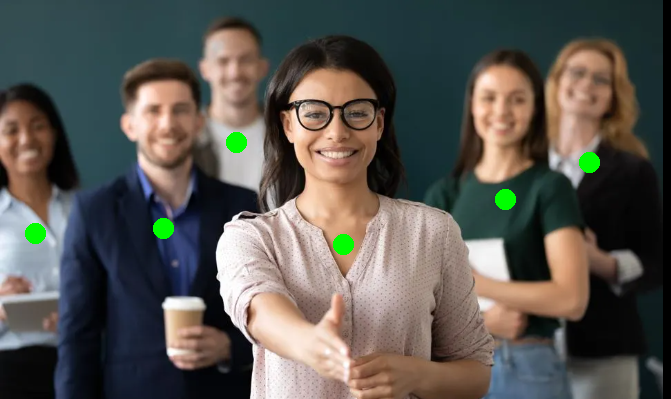

In [5]:
point("people")


Pointing: 'glasses'
Seconds taken: 5.86
Found 1 glasses(s)


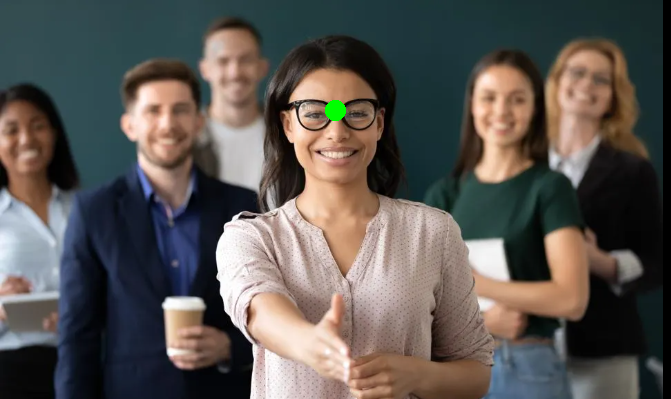

In [6]:
point("glasses")


Pointing: 'hands'
Seconds taken: 7.42
Found 6 hands(s)


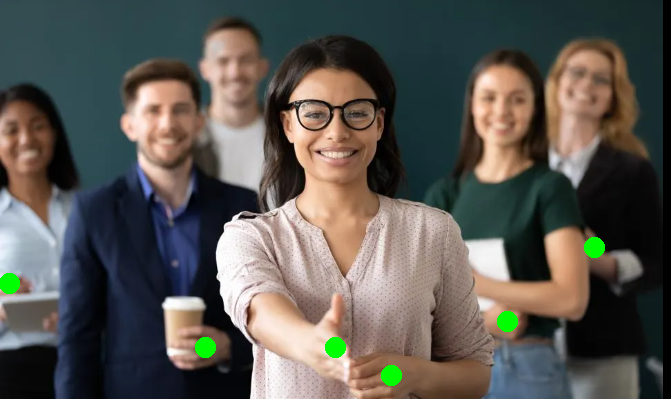

In [7]:
point("hands")


Pointing: 'nose'
Seconds taken: 7.36
Found 6 nose(s)


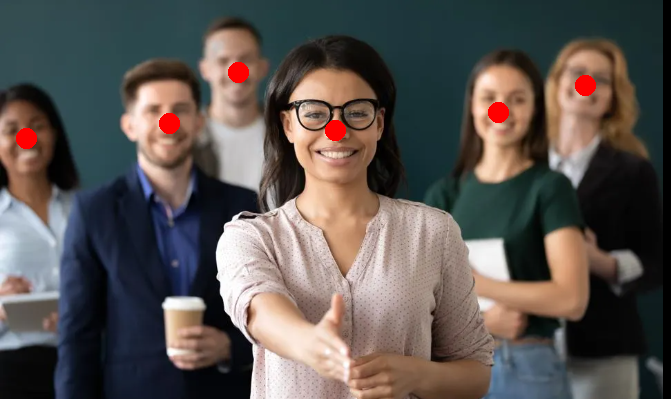

In [8]:
point("nose", color = (255, 0, 0))